# TEST Fast5Tools package

## Imports

In [14]:
# pycl imports
from pycl.pycl import head, tail, cat, linerange, fastcount, dir_walk, mkdir, hide_traceback, larger_display
from pycl.pycl import jprint as print
from pycl.pycl import jhelp as help
import numpy as np

# Matplotlib imports
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 40, 5
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')

# Jupyter tweaking
hide_traceback()
larger_display(100)

from Fast5Tools.Fast5 import Fast5, Fast5Error
from Fast5Tools.Helper_fun import find_fast5_files_gen, find_fast5_files_list

# Test Fast5

## Fast5 init

In [2]:
help (Fast5.__init__, full=True)

Parse a Fast5 file basecalled by albacore 2.0+ with h5py and extract the datasets raw, events and fastq.

The sequence and quality are extracted from the fastq and the event array is collapsed per contiguous kmers

* fast5_file: STR

Path to a fast5 file basecalled by albacore 2.0+

* analyses_group: STR (default Basecall_1D_000)

Name of the basecall analyses group in the fast5 file. If None the no basecall values will be fetched

* raw_read_num: INT (default 0)

Index of the raw read values in the raw group in the fast5 file. If None the no raw values will be fetched

* min_read_qual: INT or FLOAT  (default None)

Minimal read quality. If lower, raise a Fast5Error Exception

* min_len: INT (default None)

Minimal read length. If shorter, raise a Fast5Error Exception

* max_len: INT (default None)

Maximal read lenth. If longer, raise a Fast5Error Exception

* kmer_len: INT (default 5)

Length of the kmers in the input data

* basecall_required: BOOL (default True)

if True will raise an error if no basecall value found

* smooth_raw_signal: BOOL (default False)

If True the raw signal will be smoothed and shrink using a moving median window

* smoothing_win_size: INT (default 10)

Length of the window used to smooth the raw signal

* smoothing_win_step: INT (default 5)

Step of the window used to smooth the raw signal

In [5]:
f = Fast5 (fast5_file="./data/0/RNA_control_01.fast5", verbose=True, smooth_raw_signal=True)
print (f)

Read Fast5 File
	Found raw values
	Found basecalling values
Process collected basecalling information
	Extract information from fastq sequence
	Collapse events per kmers
	Smooth raw signal


In [6]:
f = Fast5 (fast5_file="./data/0/RNA_control_0.fast5")
print (f)

Fast5Error: Invalid File

In [23]:
f = Fast5 (fast5_file="./data/0/RNA_control_01.fast5", analyses_group="")
print (f)

Fast5Error: No Basecall Value

In [24]:
f = Fast5 (fast5_file="./data/0/RNA_control_01.fast5", raw_read_num=1)
print (f)

Fast5Error: No Raw Value

In [25]:
f = Fast5 (fast5_file="./data/0/RNA_control_01.fast5", max_len=100)
print (f)

Fast5Error: Long Sequence

In [26]:
f = Fast5 (fast5_file="../data/0/RNA_control_01.fast5", min_len=200)
print (f)

Fast5Error: Invalid File

In [27]:
f = Fast5 (fast5_file="./data/0/RNA_control_01.fast5", min_read_qual=20)
print (f)

Fast5Error: Low quality

## Test Properties

In [8]:
f = Fast5 (fast5_file="./data/0/RNA_control_02.fast5")
print("seq_from_fastq: ", f.seq)
print("seq_from_kmers: ", f.seq_from_kmers)
print("mean_qual: ", f.mean_qual)
print("n_kmers: ", f.n_kmers)
print("n_empty_kmers: ", f.n_empty_kmers)
print("n_raw: ", f.n_raw)

## Test plot_raw

In [9]:
help(Fast5.plot_raw, full=True)

Plot raw signal and kmers boundaries

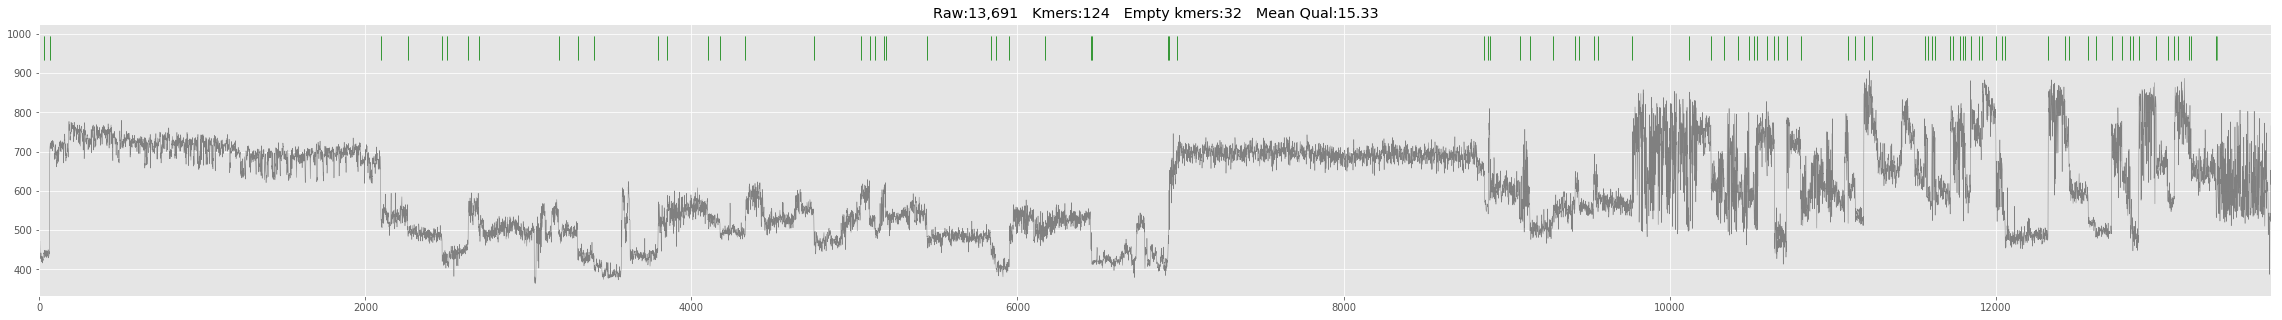

In [4]:
f = Fast5 (fast5_file="./data/0/RNA_control_02.fast5")
ax = f.plot_raw ()

## Test smooth_raw 

# Test Karystos_fun

## Test find_fast5_file_gen

In [3]:
help (find_fast5_files_gen, full=True)

Generator returning fast5 files found recursively starting from a given folder.

The recursivity stops as soon as a file matching the extension is found.

* fast5_dir: STR

Path to the folder containing Fast5 files (can be in multiple subfolder)

In [40]:
for i in find_fast5_files_gen ("./dist/"):
    print(i, line_height=1)

In [39]:
for i in find_fast5_files_gen ("./data/"):
    print(i, line_height=1)

## Test find_fast5_file_list

In [34]:
help (find_fast5_files_list, full=True)

Return a list of fast5 files found recursively starting from a given folder.

The recursivity stops as soon as a file matching the extension is found.

* fast5_dir: STR

Path to the folder containing Fast5 files (can be in multiple subfolder)

* shuffle_files: BOOL (default False)

Shuffle files before returning the list

* max_files: INT (default None)

if set will return n randomly selected files out of the list

In [37]:
for i in find_fast5_files_list ("./dist/"):
    print(i, line_height=1)

In [38]:
for i in find_fast5_files_list ("./data/", shuffle_files=True):
    print(i, line_height=1)

In [42]:
for i in find_fast5_files_list ("./data/", max_files=10):
    print(i, line_height=1)

# Dev

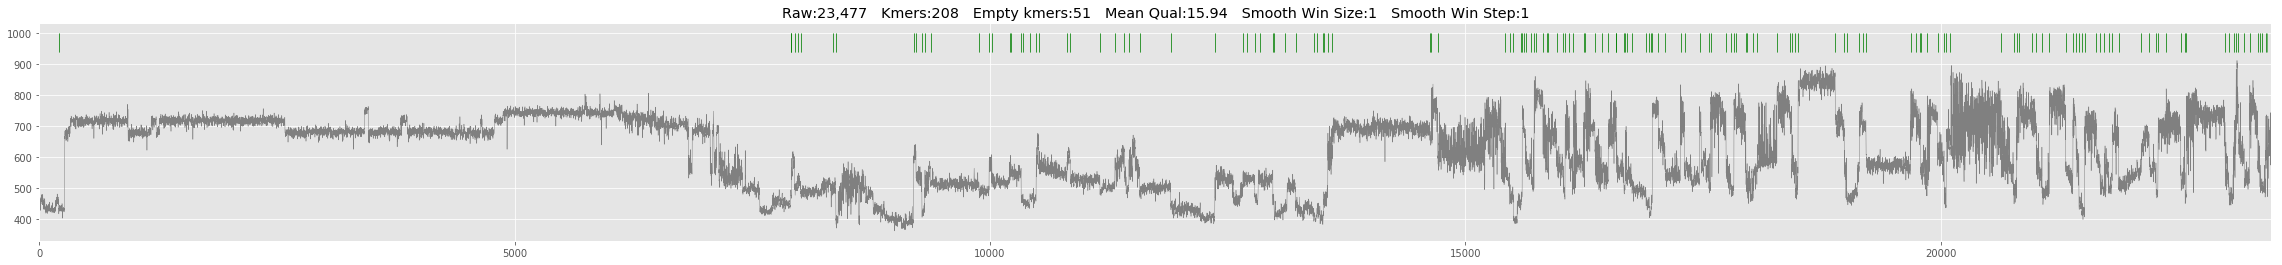

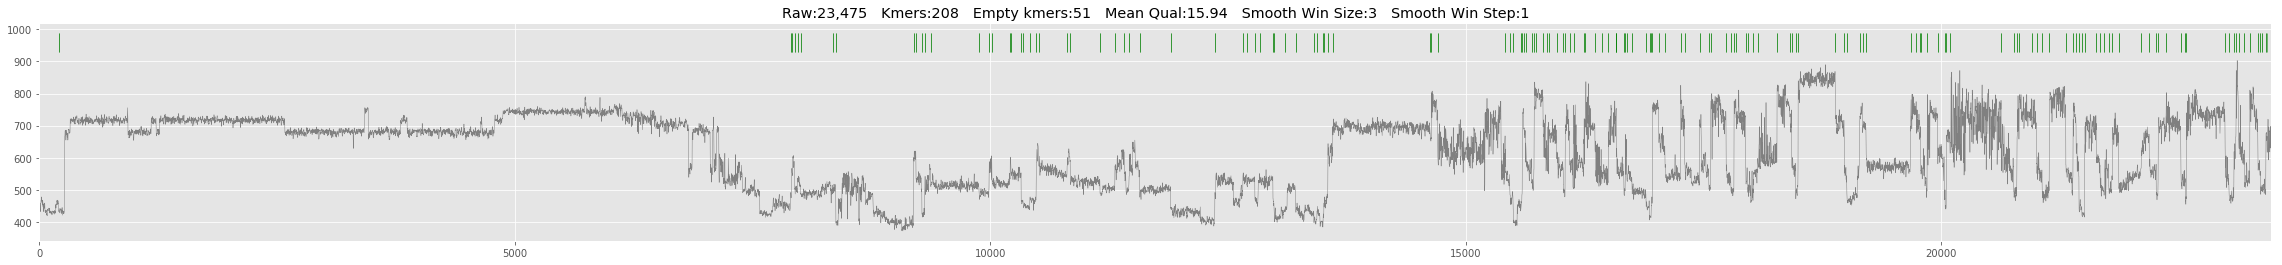

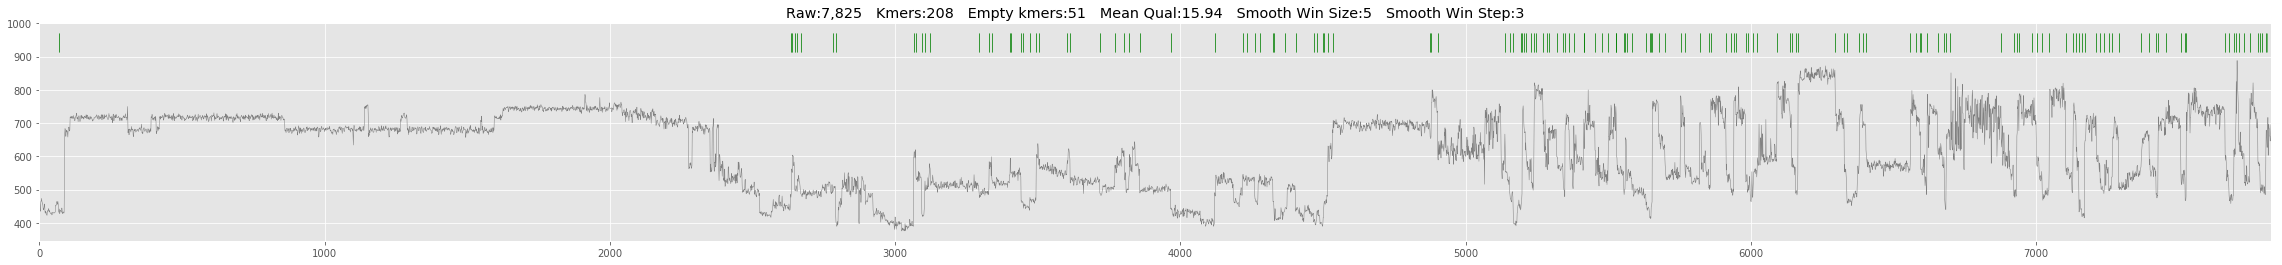

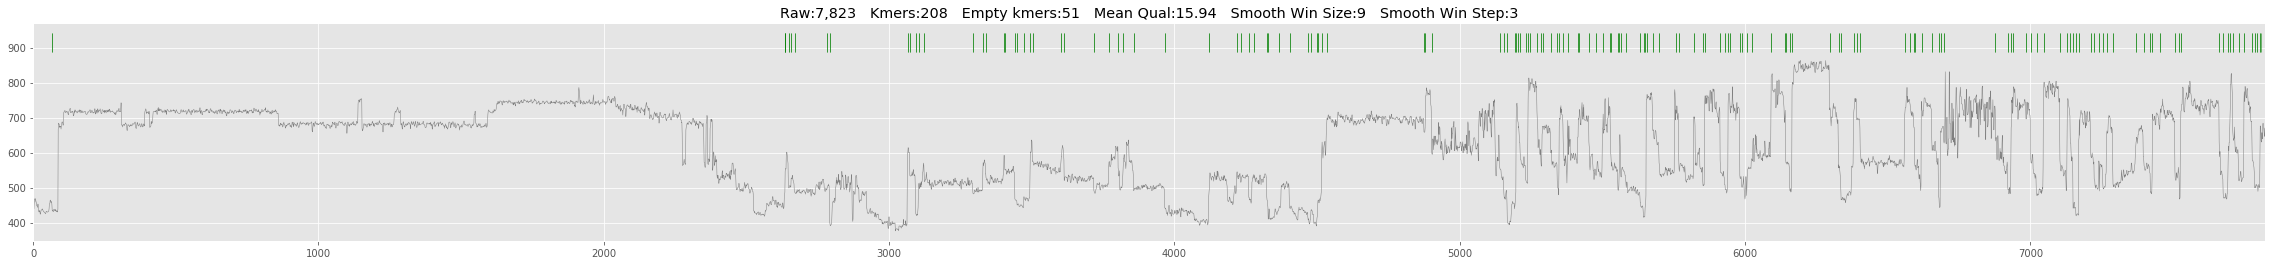

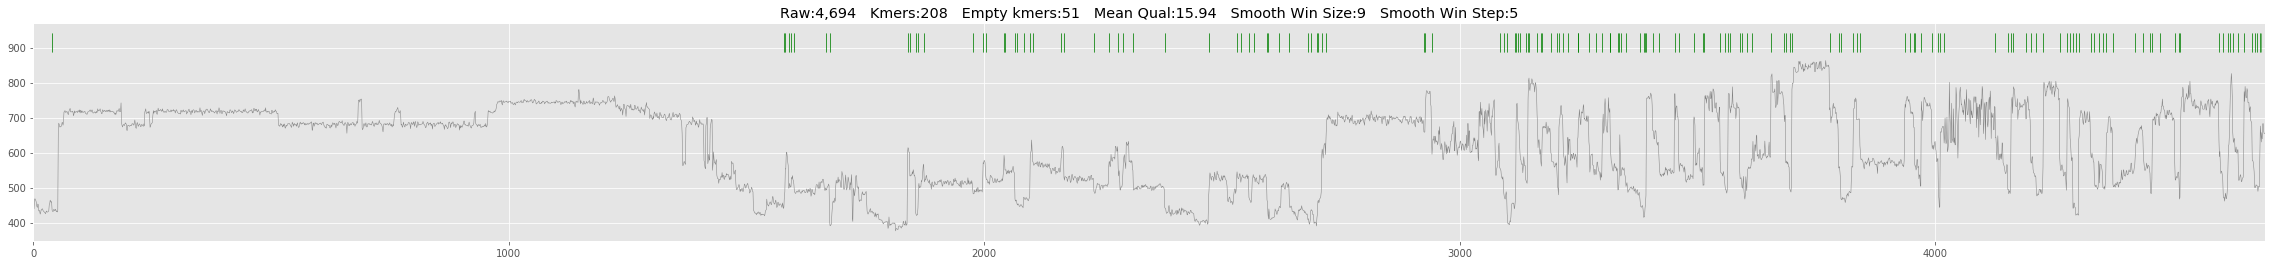

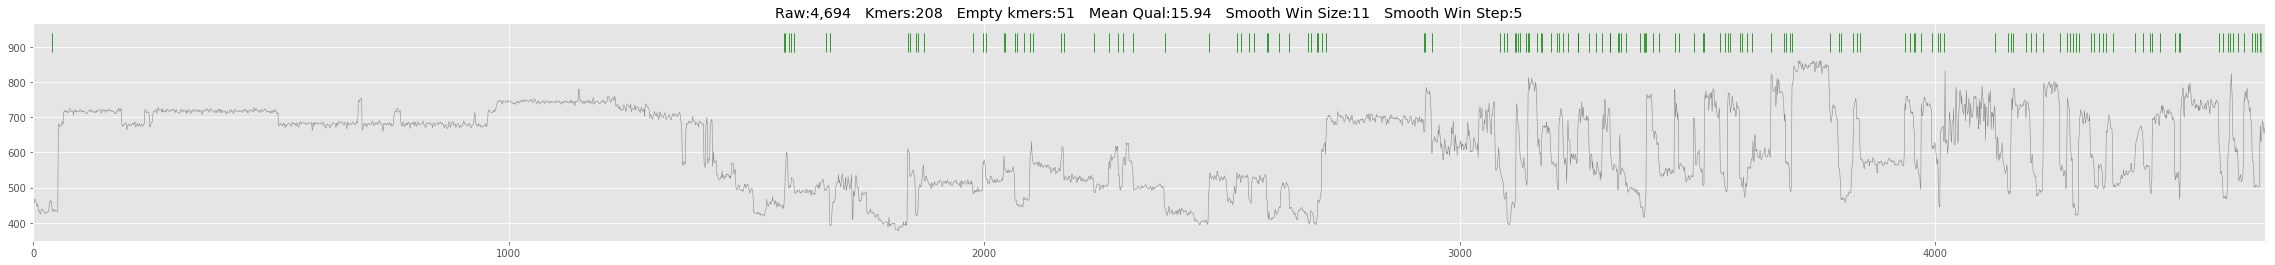

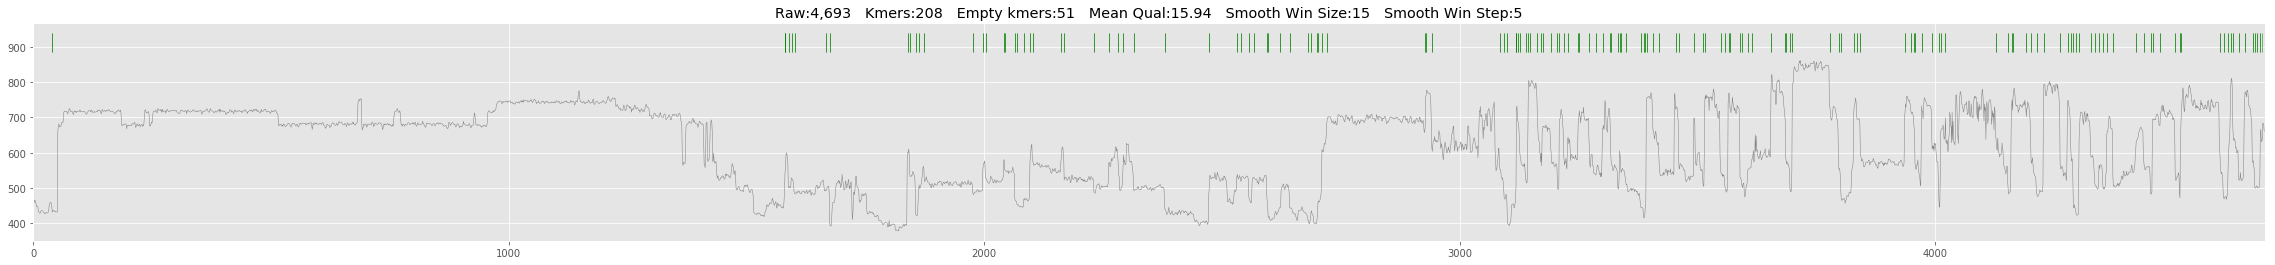

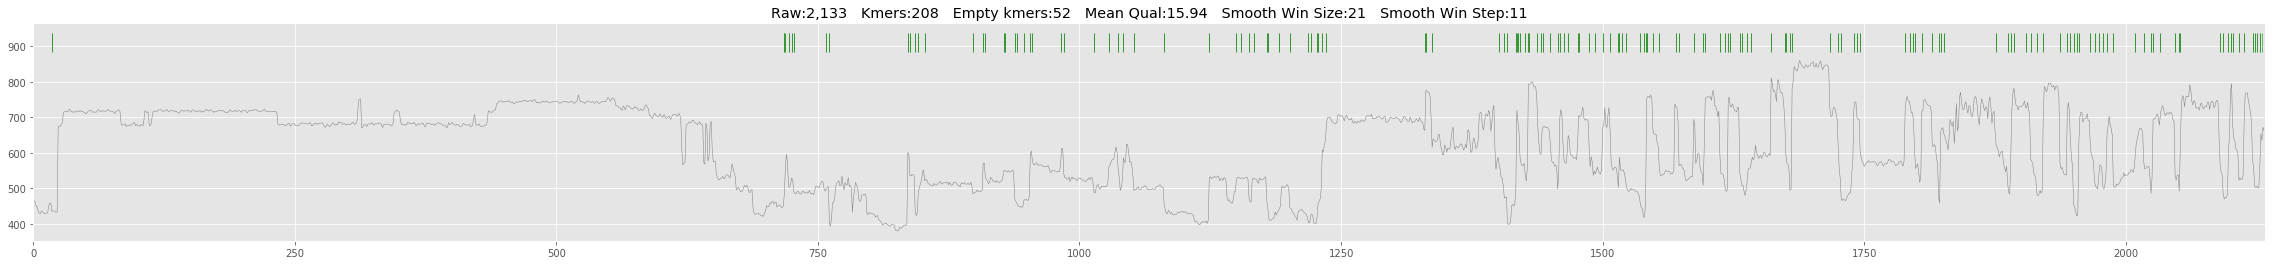

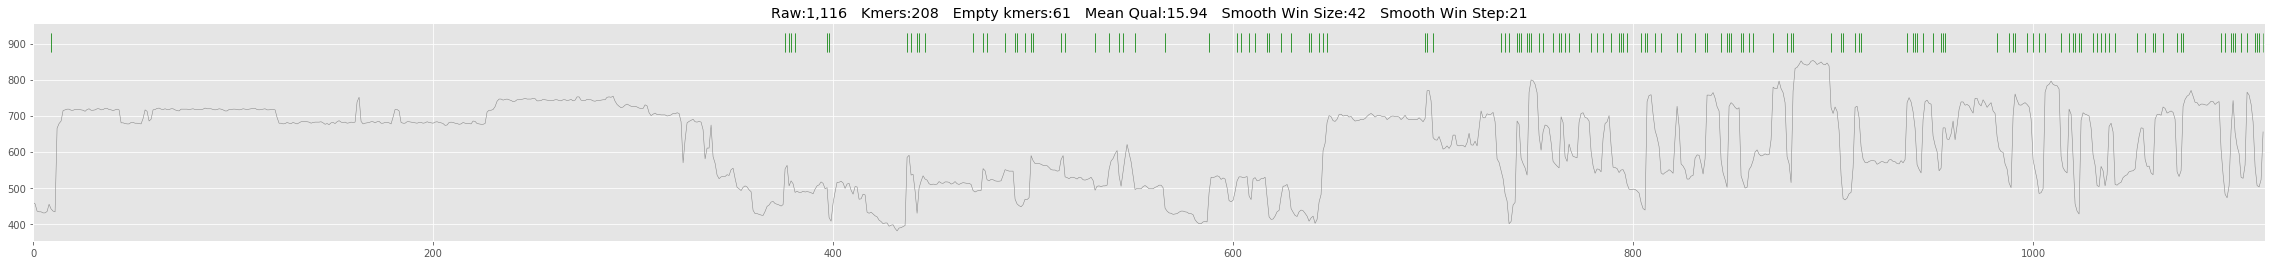

In [12]:
for win_size, win_step in [(1,1),(3,1),(5,3),(9,3),(9,5),(11,5),(15,5),(21,11),(42,21)]:
    f = Fast5 (fast5_file="./data/0/RNA_control_03.fast5", smooth_raw_signal=True, smoothing_win_size=win_size, smoothing_win_step=win_step)
    fig = pl.figure(figsize=(40,4))
    ax = f.plot_raw()

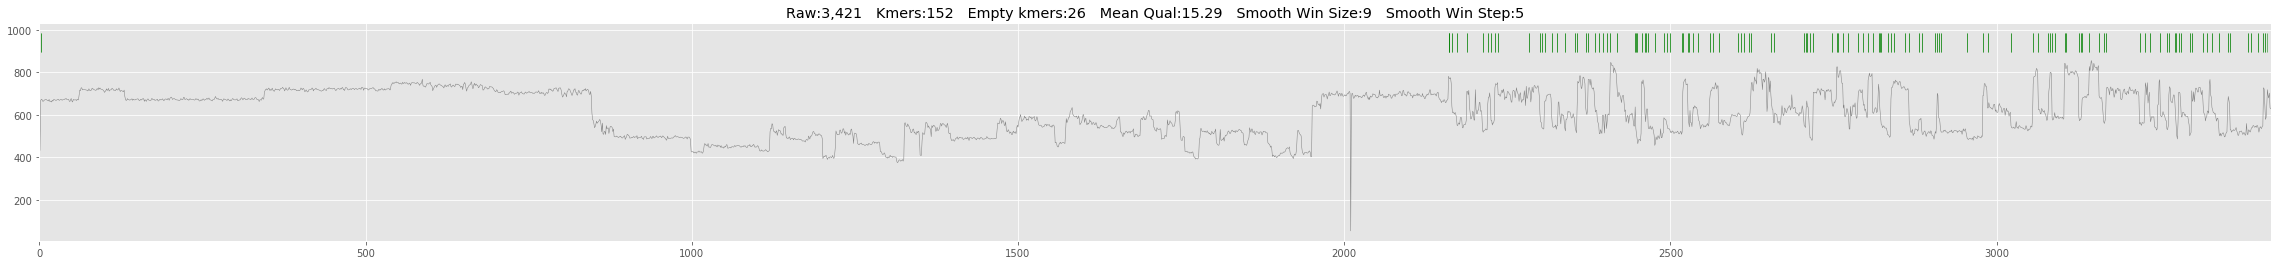

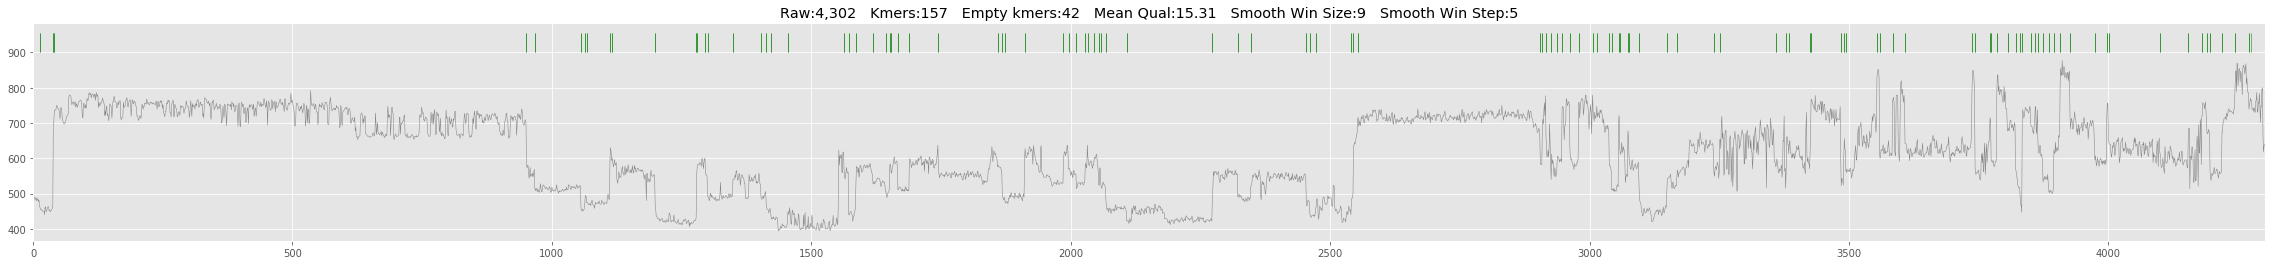

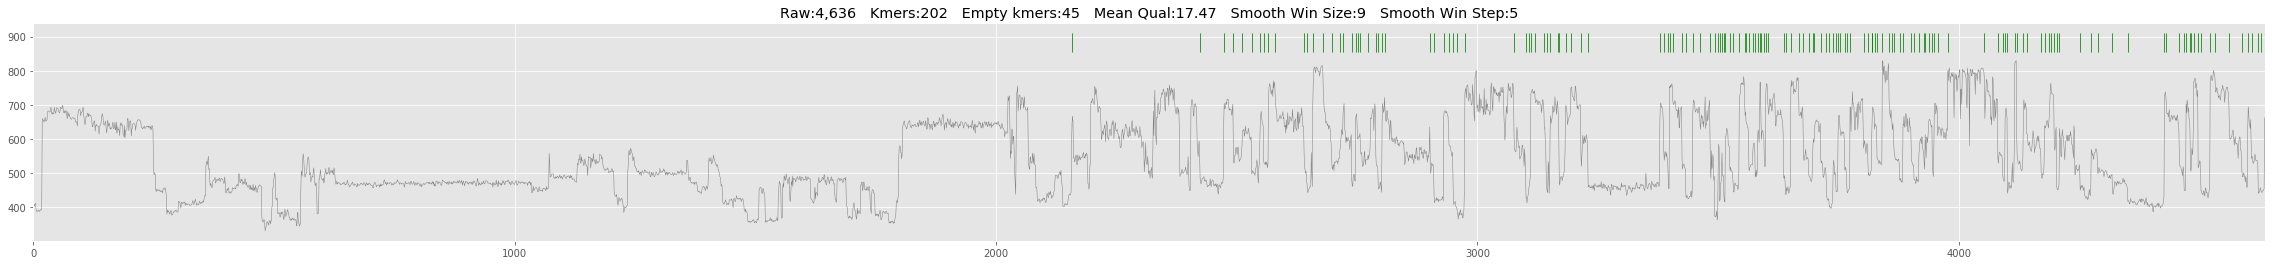

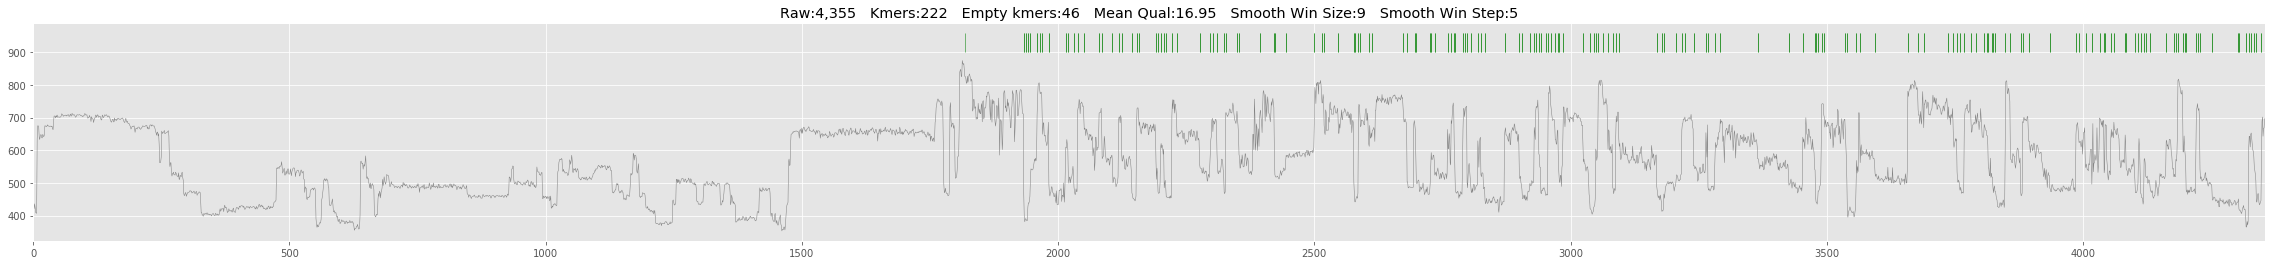

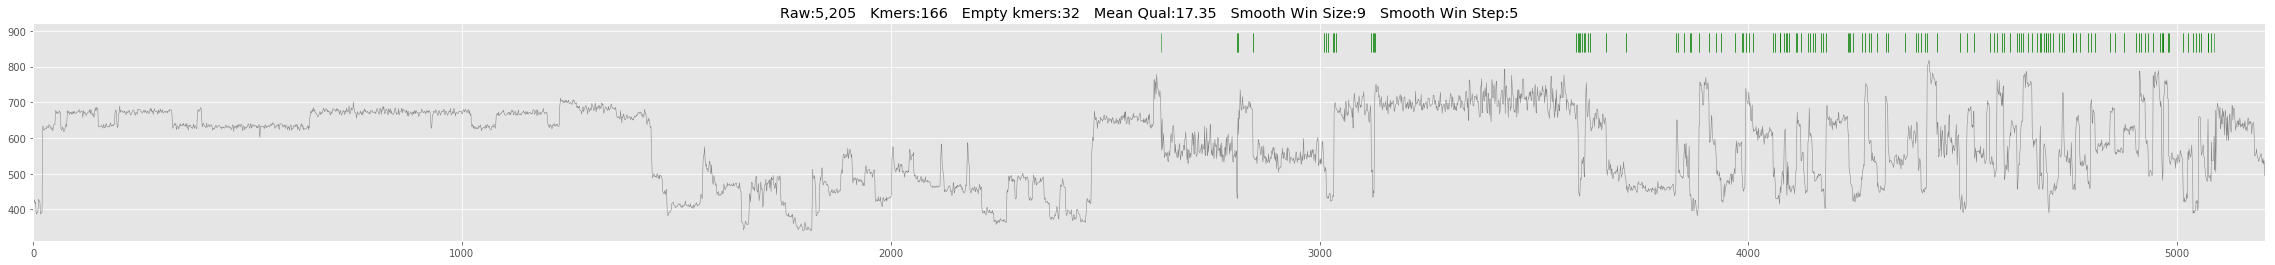

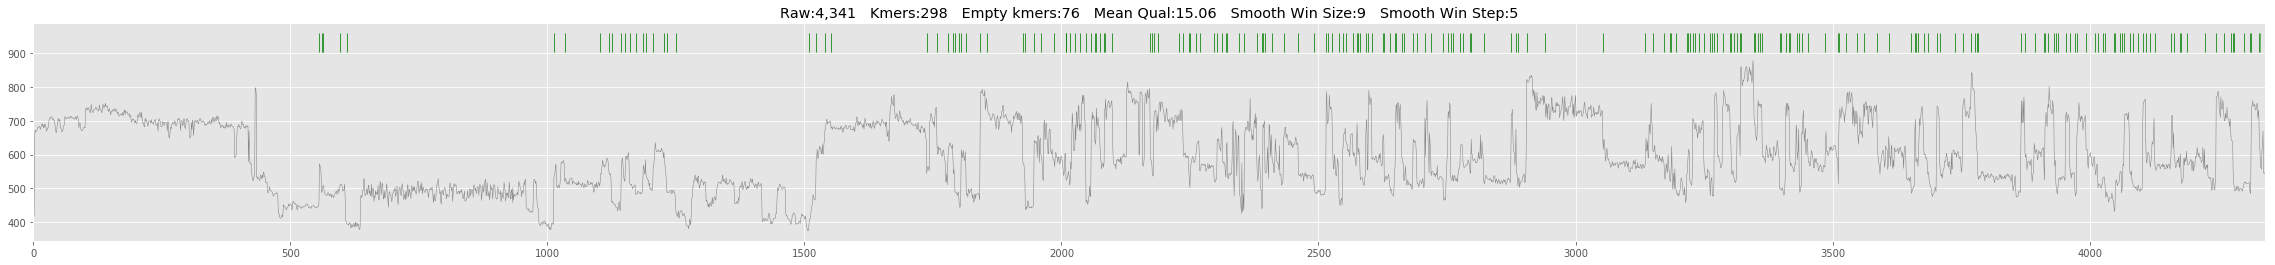

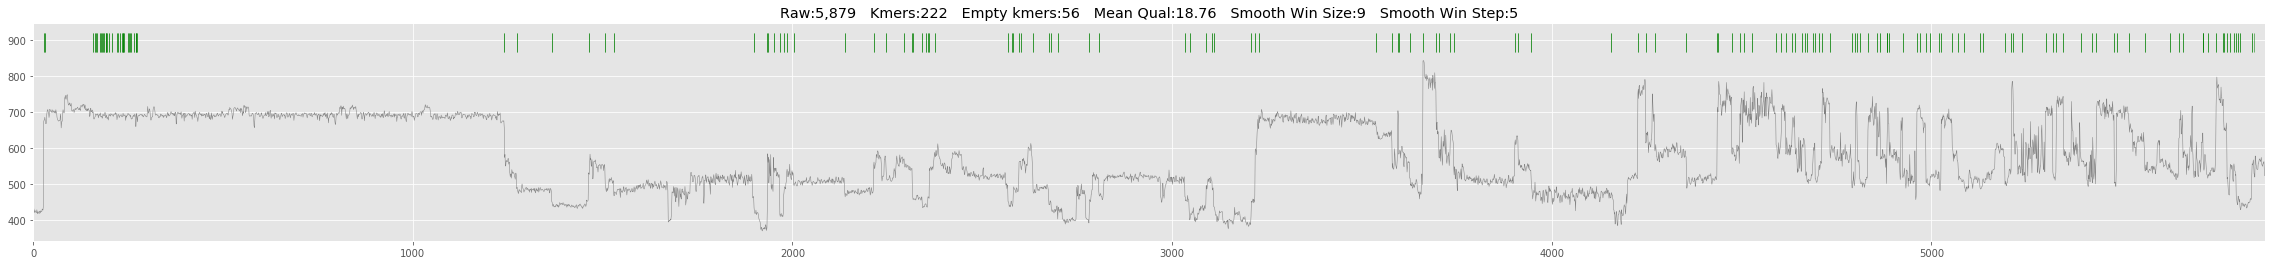

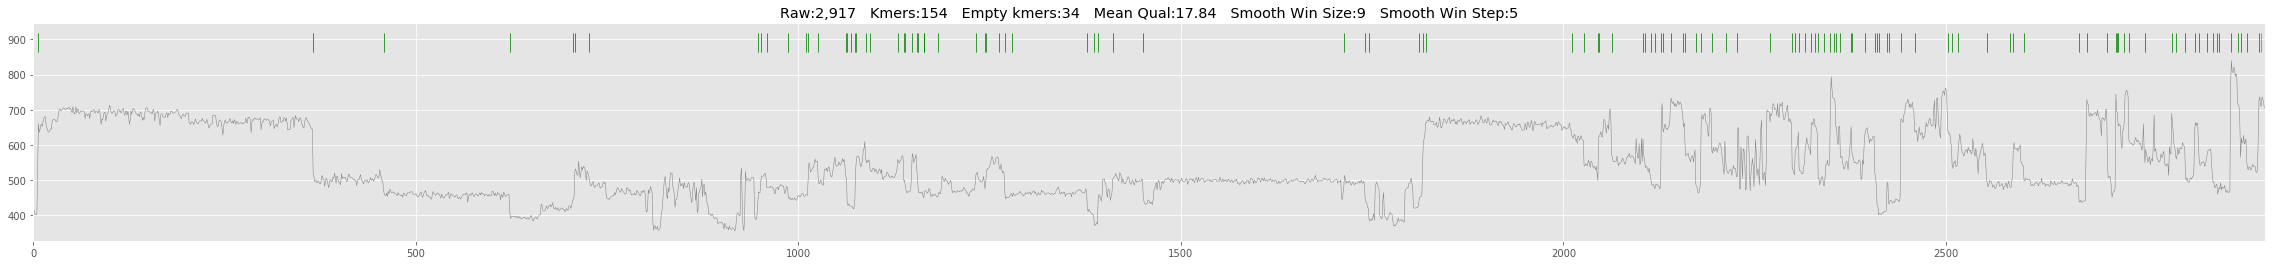

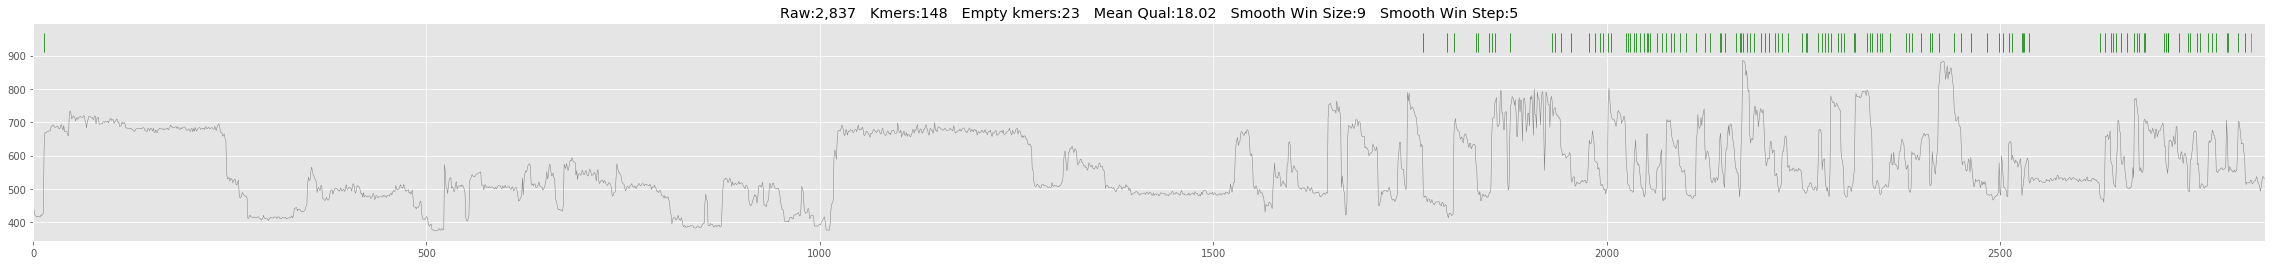

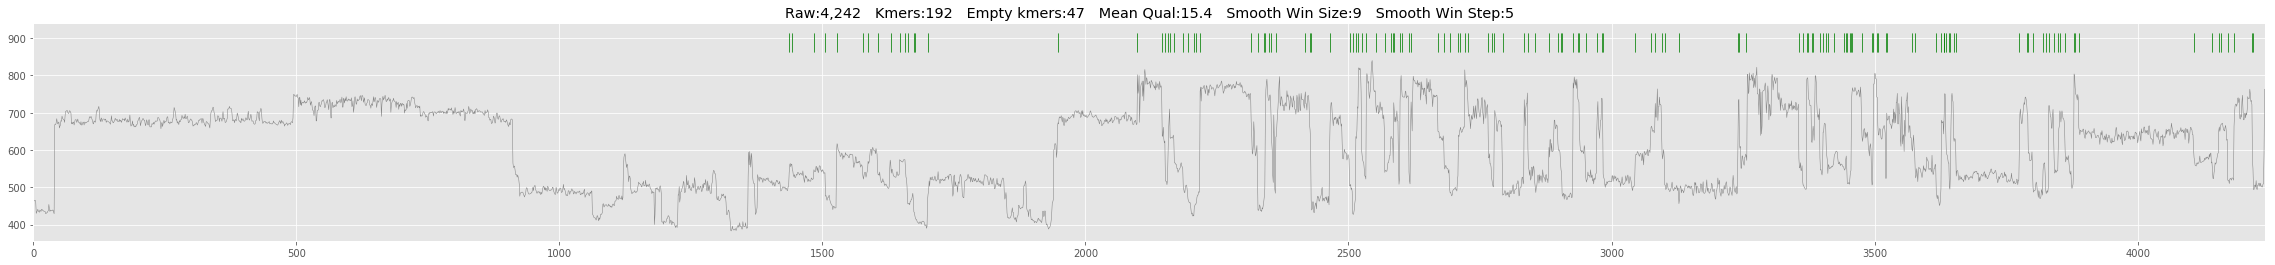

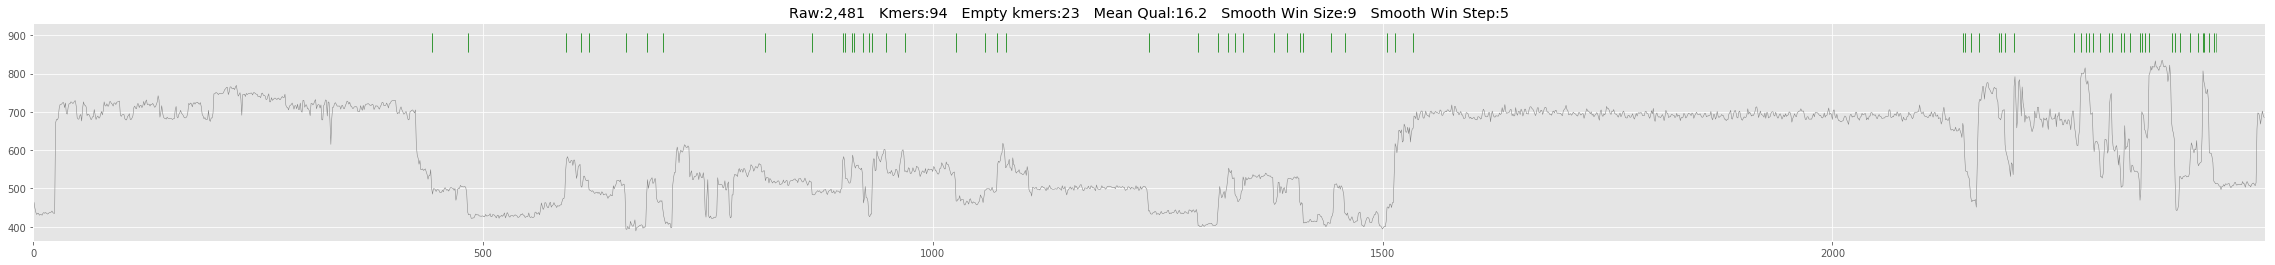

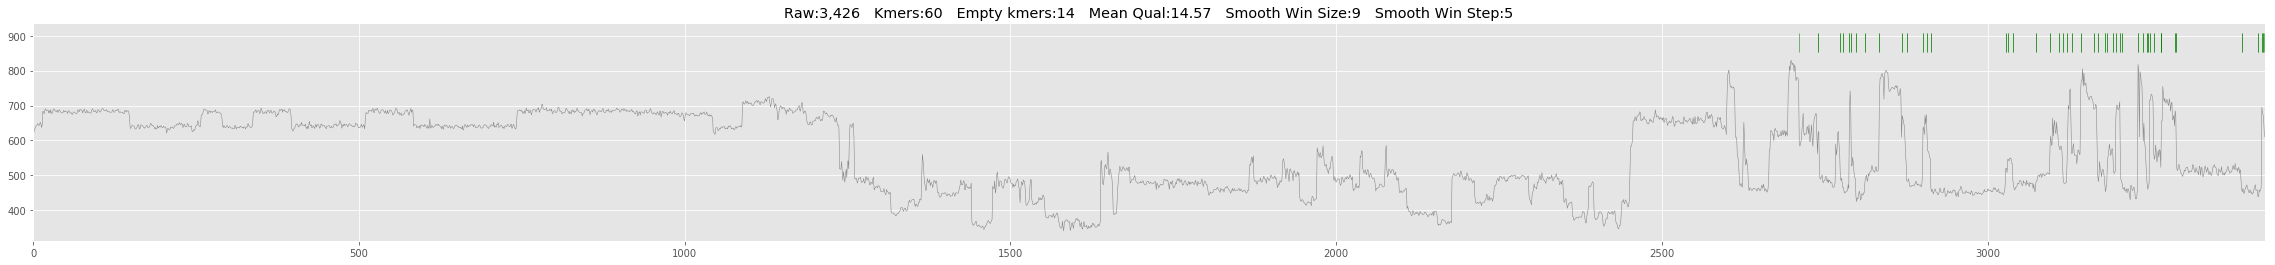

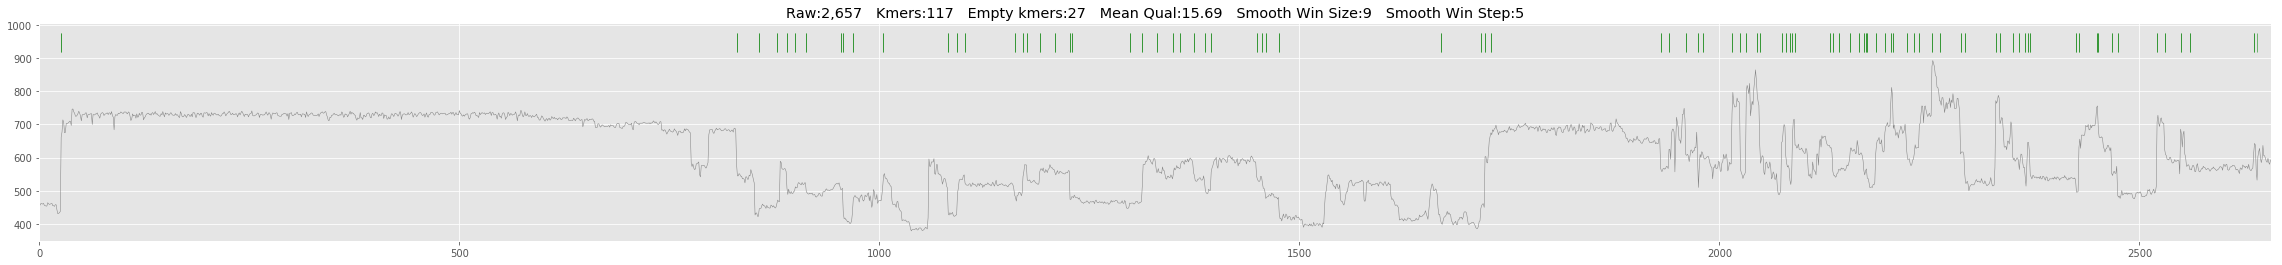

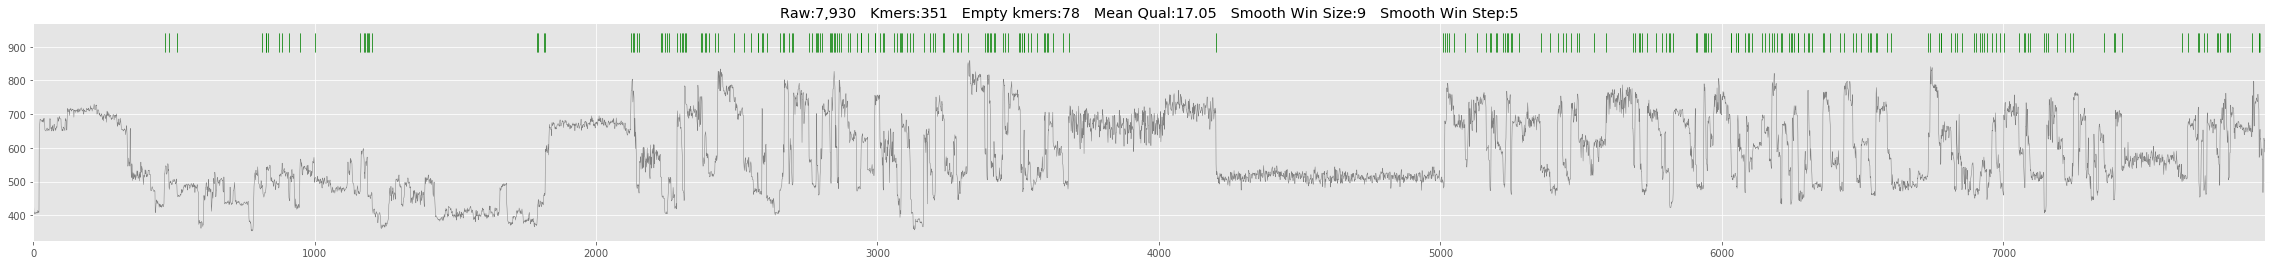

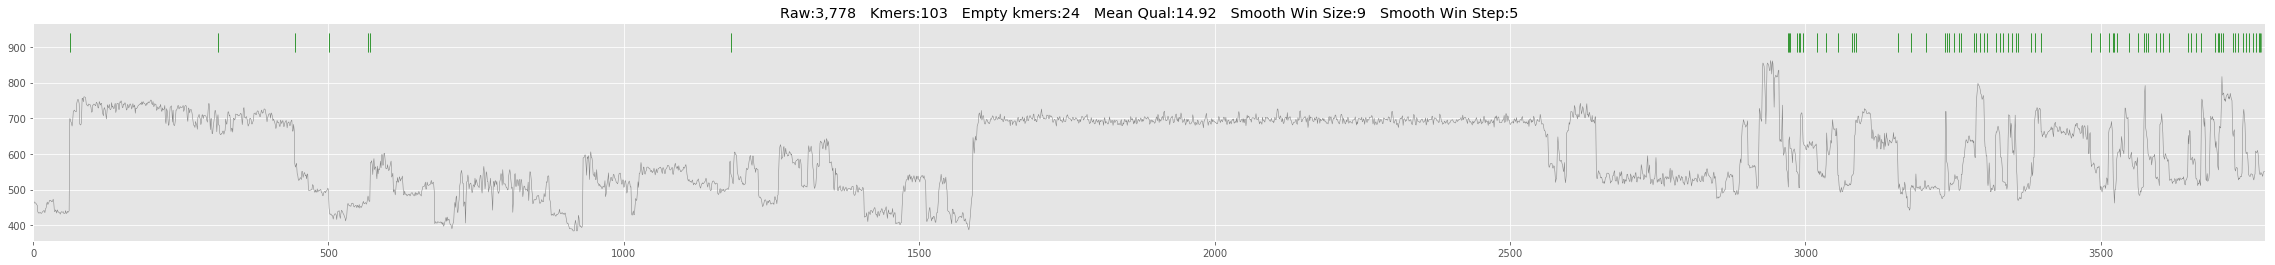

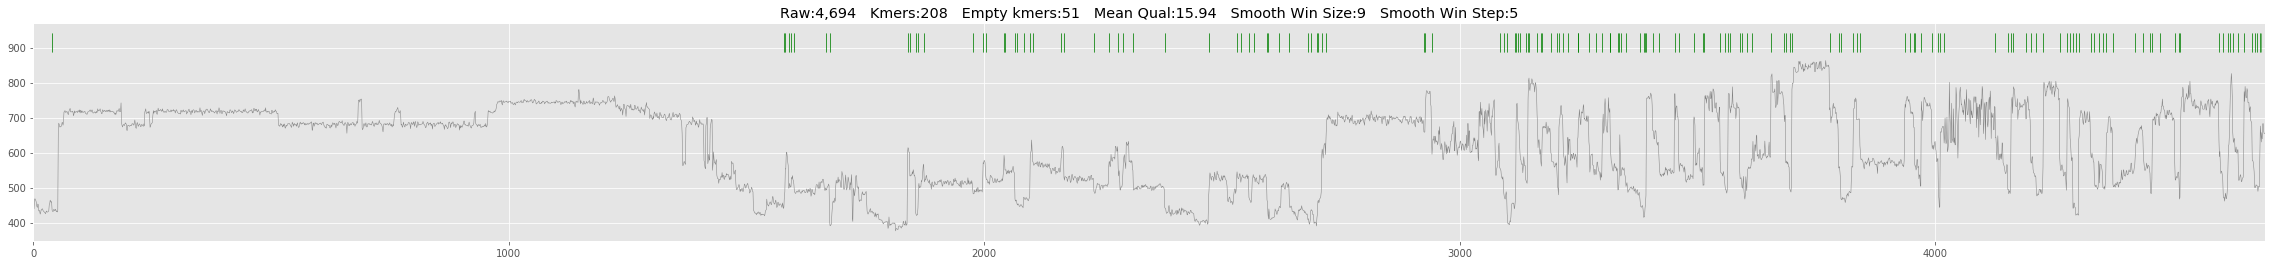

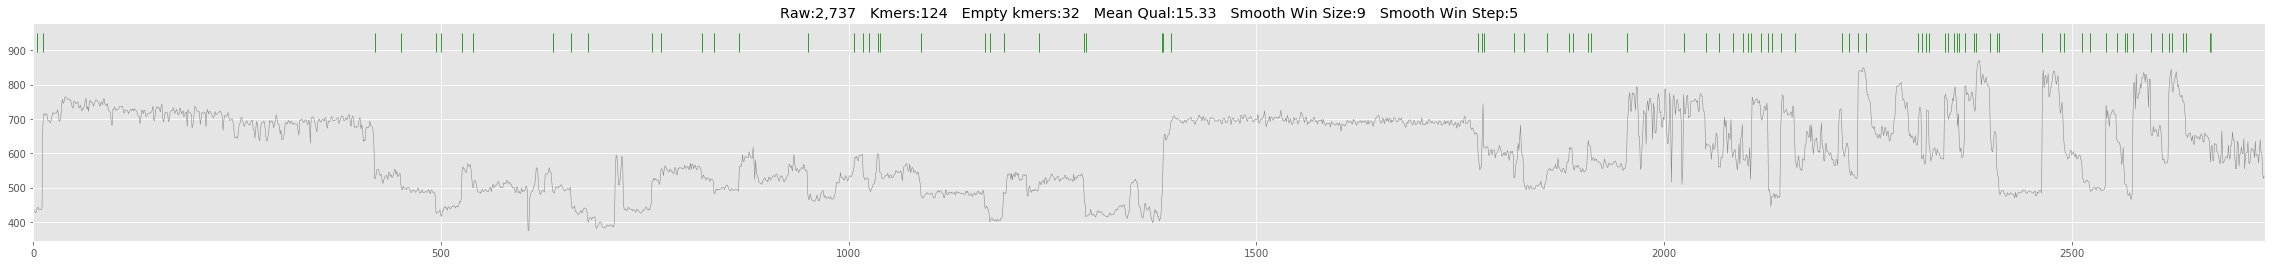

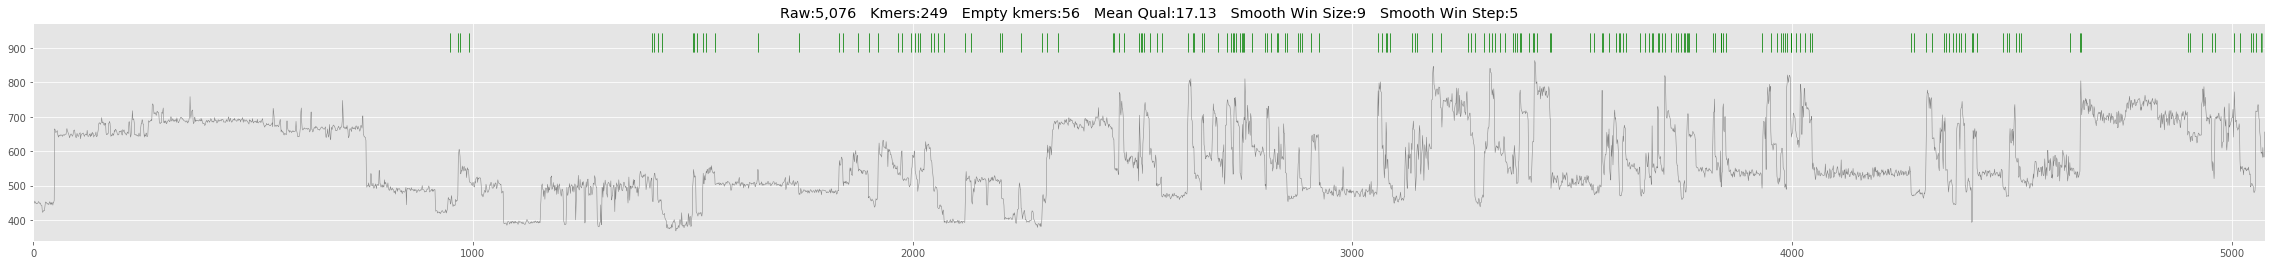

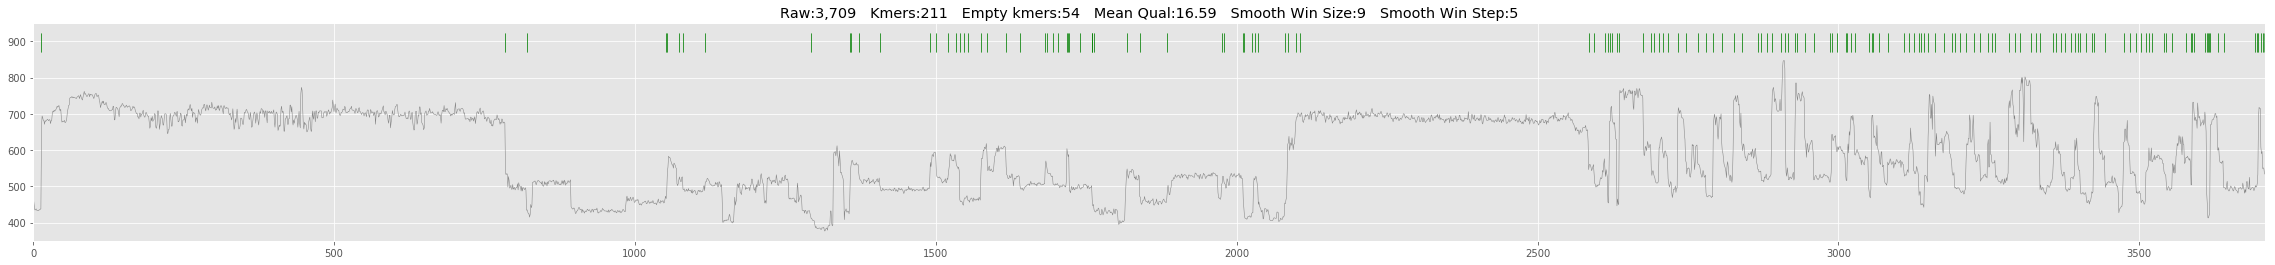

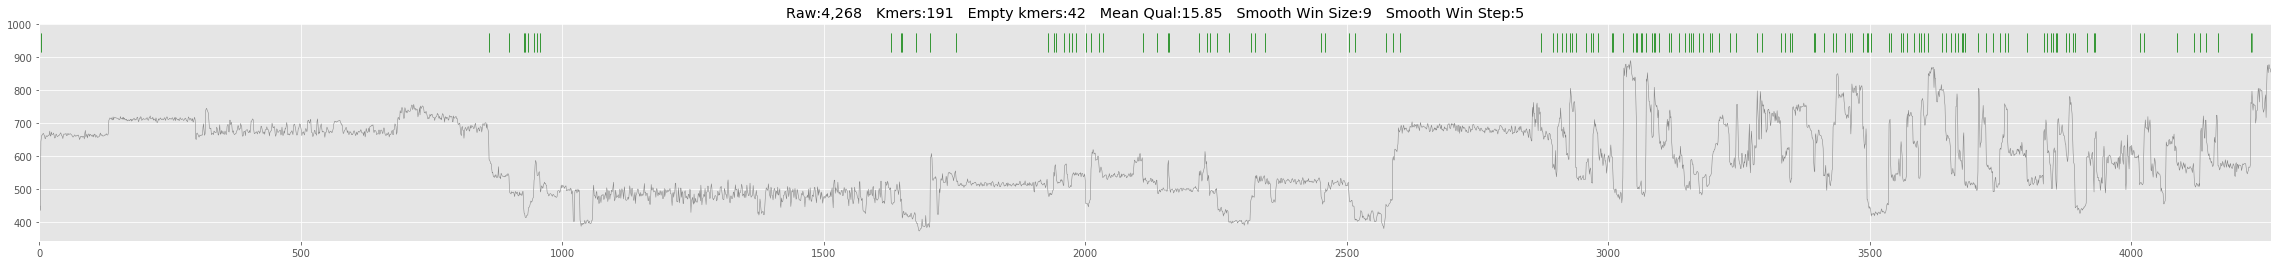

In [13]:
for fn in find_fast5_files_gen ("./data/"):
    try:
        f = Fast5 (fast5_file=fn, smooth_raw_signal=True, smoothing_win_size=9, smoothing_win_step=5)
        fig = pl.figure(figsize=(40,4))
        ax = f.plot_raw()
    except AssertionError as E:
        print (E)